In [3]:
import pandas as pd
from function import build_engine, create_table, load_data, plot_QpYpET

# Exploration of the Data

## car_data.csv

In [4]:
# load the csv

df_car_data = pd.read_csv('car_data.csv')

# Replace spaces in order to avoid error in the future

df_car_data.columns = df_car_data.columns.str.replace(' ', '_')

print(df_car_data.info())
print(df_car_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Make         500 non-null    object
 1   Model        500 non-null    object
 2   Year         500 non-null    int64 
 3   Price        500 non-null    int64 
 4   Engine_Type  500 non-null    object
dtypes: int64(2), object(3)
memory usage: 19.7+ KB
None
             Year         Price
count   500.00000    500.000000
mean   2015.90000  50644.000000
std       3.84494  17400.656012
min    2010.00000  20000.000000
25%    2012.00000  36000.000000
50%    2016.00000  51000.000000
75%    2019.00000  66000.000000
max    2022.00000  80000.000000


## consumer_data.csv

Here there is an issue with the csv, it has 6 columns of data but 5 columns of vertical index, a work arrond was applied to fix the broken csv

In [5]:
df_consumer_data = pd.read_csv('consumer_data.csv',names= ['Country','Make','Model','Year','Review_Score','Sales_Volume'], skiprows=1)

print(df_consumer_data.info())
print(df_consumer_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105755 entries, 0 to 105754
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Country       105755 non-null  object 
 1   Make          105755 non-null  object 
 2   Model         105755 non-null  object 
 3   Year          105755 non-null  int64  
 4   Review_Score  105755 non-null  float64
 5   Sales_Volume  105755 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 4.8+ MB
None
                Year   Review_Score  Sales_Volume
count  105755.000000  105755.000000  105755.00000
mean     2016.000000       2.995719    9512.12668
std         3.741675       1.098103    5185.19460
min      2010.000000       1.100000     500.00000
25%      2013.000000       2.000000    5017.00000
50%      2016.000000       3.000000    9524.00000
75%      2019.000000       3.900000   14018.50000
max      2022.000000       4.900000   18500.00000


In [6]:
engine = build_engine()

## Create the tables

Here we will create the two tables in the postgres SQL database with the help of the create_table function.

In [7]:
create_table(engine)

Table already exists.


## Load the data

Here we will load the data into the tables we have previously created with the load_date function

In [8]:
load_data('car_data.csv', engine, tablename='car_data', columns=['Make', 'Model', 'Year', 'Price', 'Engine_Type'])

Data 'car_data.csv' loaded succesfully into the base car_data


In [9]:
load_data('consumer_data.csv', engine, tablename='consumer_data', columns=['Country', 'Make', 'Model', 'Year', 'Review_Score', 'Sales_Volume'])

Data 'consumer_data.csv' loaded succesfully into the base consumer_data


# Plot the data

Here we will plot the data from the database and return a graph that would show the amount of electric vs thermal cars sold per year.

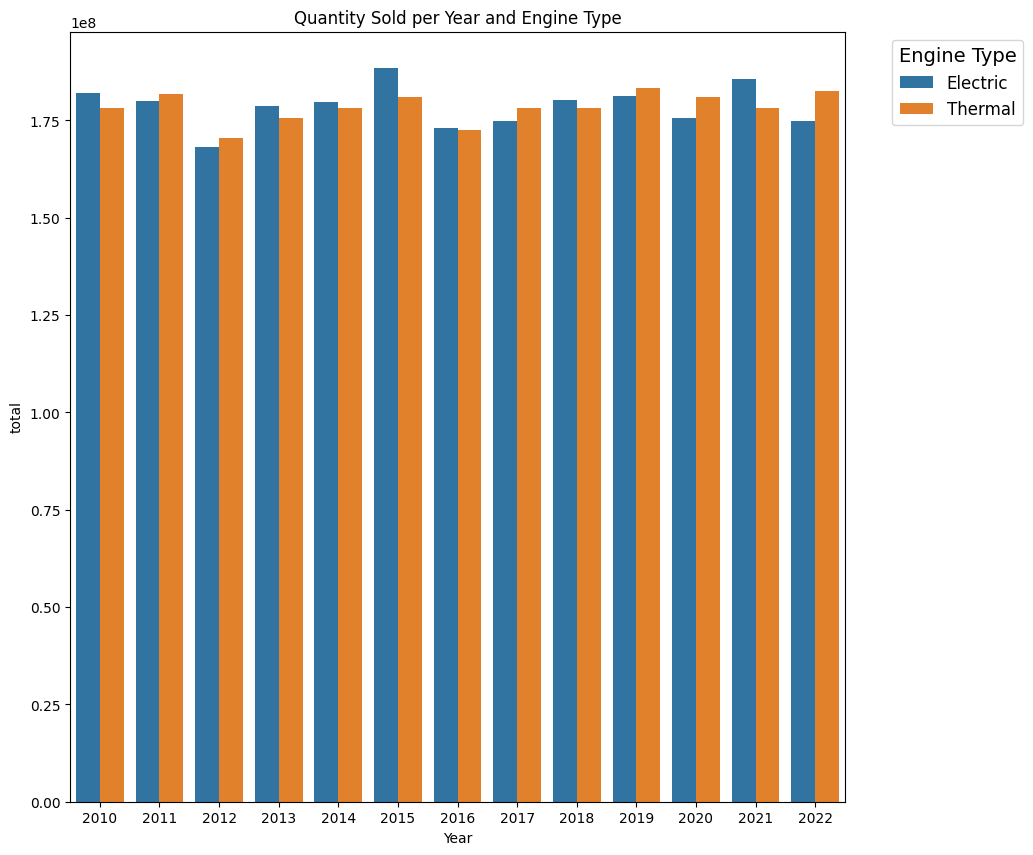

In [11]:
plot_QpYpET(engine)